# Análisis de Precios de Portátiles
Este notebook analiza un dataset de precios de portátiles, explorando la distribución de marcas, la relación entre características técnicas y precio, y entrenando un modelo de Machine Learning para predecir precios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

## Carga del Dataset

In [2]:
price_data = pd.read_csv('laptop_prices.csv')
print(price_data.head())

    Brand  Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0    Asus         3.830296        16               512    11.185147  2.641094   
1    Acer         2.912833         4              1000    11.311372  3.260012   
2  Lenovo         3.241627         4               256    11.853023  2.029061   
3    Acer         3.806248        16               512    12.280360  4.573865   
4    Acer         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718  


## Exploración del Dataset

In [3]:
print(price_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       995 non-null    float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB
None


## Manejo de Valores Faltantes

In [9]:
if 'Brand' in price_data.columns:
    price_data['Brand'].fillna('Desconocido')
for column in price_data.select_dtypes(include=['number']).columns:
    price_data[column] = price_data.groupby('Brand')[column].transform(lambda x: x.fillna(x.mean()))
print(price_data.isnull().sum())

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


## Distribución de Marcas

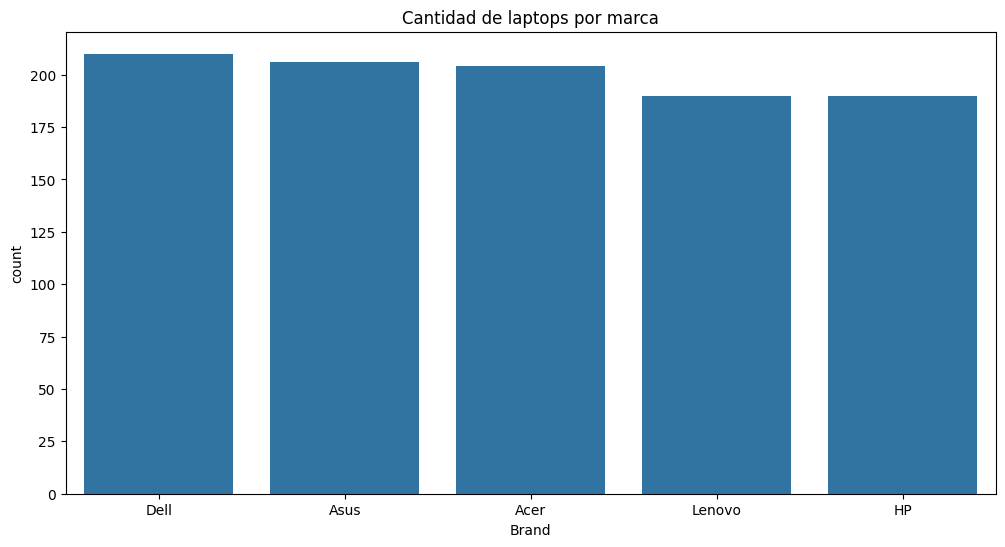

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=price_data, order=price_data['Brand'].value_counts().index)
plt.title('Cantidad de laptops por marca')
plt.show()

## Preparación de Datos para Machine Learning

In [11]:
X = price_data[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Weight']]
y = price_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Entrenamiento de un Modelo de Machine Learning

In [12]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('Error en entrenamiento:', mean_absolute_error(y_train, y_pred_train))
print('Error en validación:', mean_absolute_error(y_test, y_pred_test))

Error en entrenamiento: 132.9161967895939
Error en validación: 165.82662221427546


## Optimización de Hiperparámetros: n_estimators"

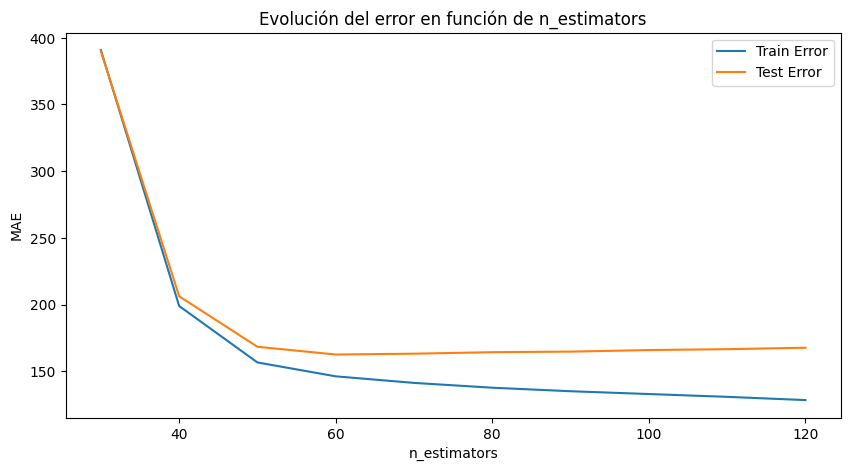

In [13]:
n_estimators_range = range(30, 121, 10)
train_errors = []
test_errors = []
for n in n_estimators_range:
    model = GradientBoostingRegressor(n_estimators=n, random_state=1)
    model.fit(X_train, y_train)
    train_errors.append(mean_absolute_error(y_train, model.predict(X_train)))
    test_errors.append(mean_absolute_error(y_test, model.predict(X_test)))

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, train_errors, label='Train Error')
plt.plot(n_estimators_range, test_errors, label='Test Error')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.title('Evolución del error en función de n_estimators')
plt.legend()
plt.show()